In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [10]:
train = pd.read_csv('/content/mnist_train.csv')
test = pd.read_csv('/content/mnist_test.csv')

In [11]:
X_train = train.drop("label", axis=1).values
y_train = train["label"].values

In [12]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test = test.drop("label", axis=1).values
y_test = test["label"].values

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8688 - loss: 0.4430 - val_accuracy: 0.9618 - val_loss: 0.1199
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9668 - loss: 0.1100 - val_accuracy: 0.9738 - val_loss: 0.0892
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0739 - val_accuracy: 0.9762 - val_loss: 0.0788
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0546 - val_accuracy: 0.9770 - val_loss: 0.0919
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9783 - val_loss: 0.0777
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0348 - val_accuracy: 0.9767 - val_loss: 0.0872
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9773 - val_loss: 0.0922
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0252 

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.1132
Test Accuracy: 0.9764999747276306


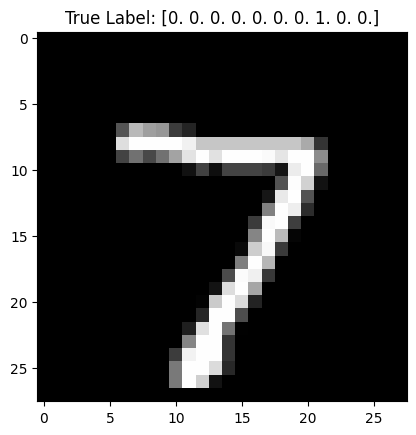

In [20]:
import matplotlib.pyplot as plt
image = X_test[0]
true_label = y_test[0]
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.show()

In [21]:
prediction = model.predict(np.array([image]))
predicted_label = np.argmax(prediction)
print("Predicted Lable:",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Lable: 7
